In [1]:
import pandas as pd
data = pd.read_csv("citation_data.csv")

In [2]:
data

,Unnamed: 0,origin_dir,block,reference_dir
0,0,arxiv_data/Using large language models for (de...,\n The main drawbacks were the followin...,arxiv_data/Number Theory and Axiomatic Geometr...
1,1,arxiv_data/Using large language models for (de...,"\n In our system, which will be integra...",arxiv_data/Number Theory and Axiomatic Geometr...
2,2,arxiv_data/Using large language models for (de...,"\n In our system, which will be integra...",arxiv_data/Improving the Diproche CNL through ...
3,3,arxiv_data/Using large language models for (de...,"\n In our system, which will be integra...",arxiv_data/Using Automated Theorem Provers for...
4,4,arxiv_data/Using large language models for (de...,"\n Besides formalization, learning how ...",arxiv_data/Number Theory and Axiomatic Geometr...
...,...,...,...,...
40383,40383,arxiv_data/Unsupervised Translation of Program...,"\n In practice, XLM pretraining and d...",arxiv_data/Unsupervised Neural Machine Transla...
40384,40384,arxiv_data/Unsupervised Translation of Program...,\n We use a transformer with 6 layers...,arxiv_data/Attention Is All You Need
40385,40385,arxiv_data/Unsupervised Translation of Program...,\n Recent approaches in multilingual ...,arxiv_data/SentencePiece: A simple and languag...
40386,40386,arxiv_data/Unsupervised Translation of Program...,\n Recent approaches in multilingual ...,arxiv_data/Cross-lingual Language Model Pretra...


In [19]:
grouped_data = data.groupby(["origin_dir", "reference_dir"]).agg({"block": list}).reset_index()

In [20]:
grouped_data

,origin_dir,reference_dir,block
0,arxiv_data/A Precis of Language Models are not...,arxiv_data/Learning in High Dimension Always A...,[\n The second possibility is that LMs ...
1,arxiv_data/A Precis of Language Models are not...,arxiv_data/Neural Network Acceptability Judgments,[\n The claim that grammar has a centra...
2,arxiv_data/A Primer in BERTology: What we know...,arxiv_data/A Matter of Framing: The Impact of ...,"[\n Furthermore, different probing me..."
3,arxiv_data/A Primer in BERTology: What we know...,arxiv_data/A Mutual Information Maximization P...,[\n ref45 ref66\n showed tha...
4,arxiv_data/A Primer in BERTology: What we know...,arxiv_data/ALBERT: A Lite BERT for Self-superv...,[\n Other techniques include decompos...
...,...,...,...
433,arxiv_data/Using Document Similarity Methods t...,arxiv_data/Unified Pre-training for Program Un...,[\n sub-fields to software engineering ...
434,arxiv_data/Using Document Similarity Methods t...,arxiv_data/Unsupervised Translation of Program...,[\n Computational Accuracy @ k (CA@k)...
435,arxiv_data/Using large language models for (de...,arxiv_data/Improving the Diproche CNL through ...,"[\n In our system, which will be integr..."
436,arxiv_data/Using large language models for (de...,arxiv_data/Number Theory and Axiomatic Geometr...,[\n The main drawbacks were the followi...


In [33]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.from_pandas_edgelist(grouped_data, source='origin_dir', target='reference_dir', edge_attr='block', create_using=nx.DiGraph())

Component 1: Nodes: 3 Edges: 2
Component 2: Nodes: 343 Edges: 417
Component 3: Nodes: 2 Edges: 1
Component 4: Nodes: 10 Edges: 9
Component 5: Nodes: 4 Edges: 3
Component 6: Nodes: 7 Edges: 6


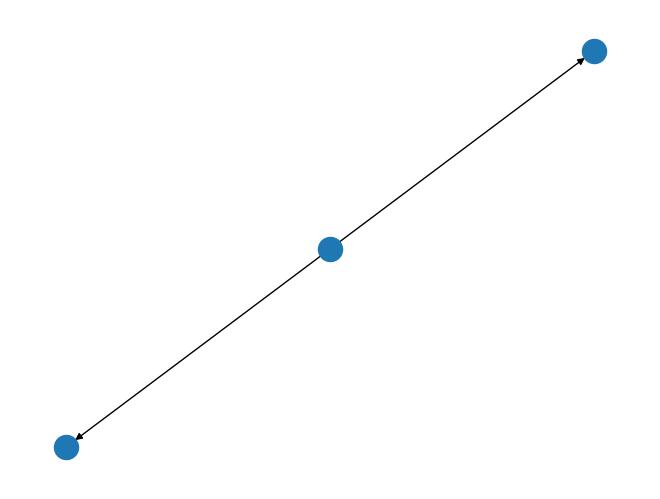

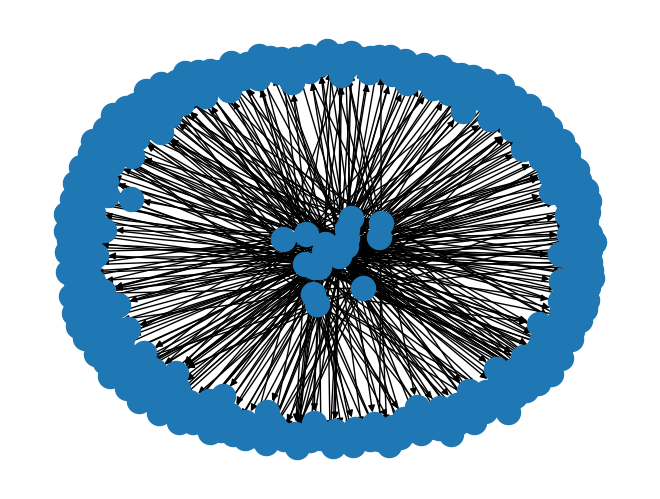

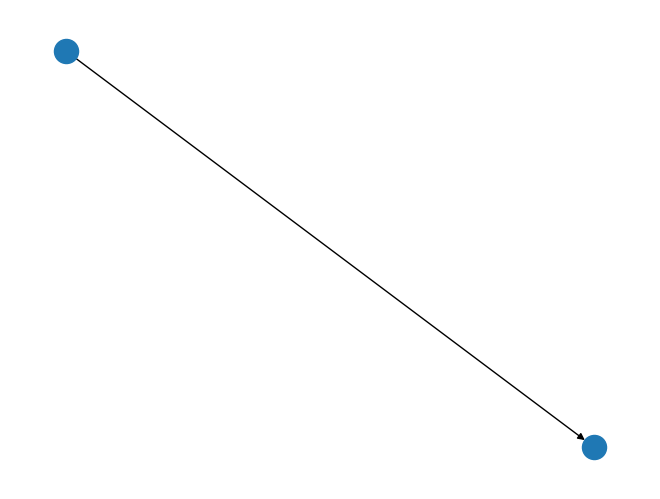

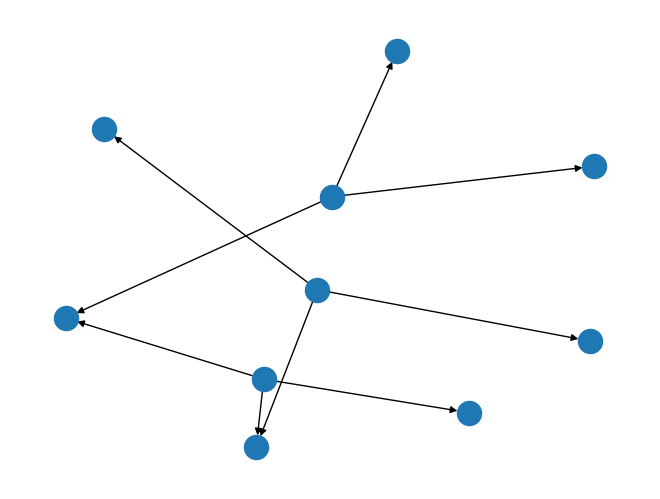

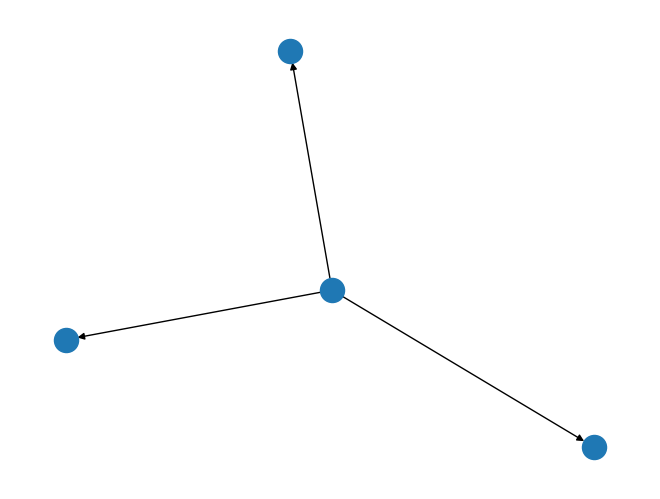

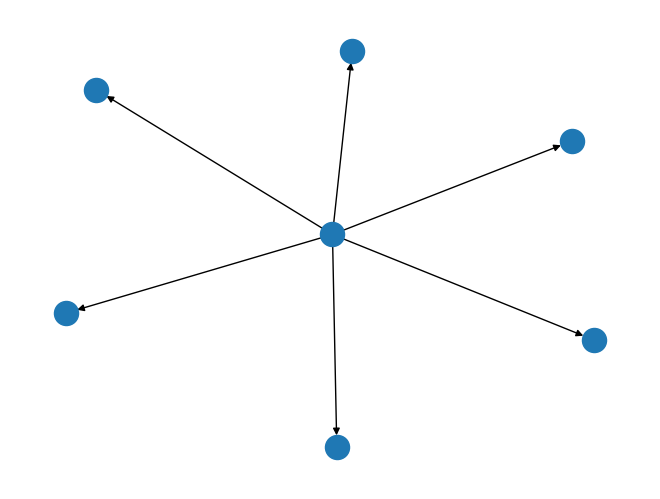

In [35]:
components = [G.subgraph(c).copy() for c in nx.weakly_connected_components(G)]
for idx,g in enumerate(components,start=1): 
    print(f"Component {idx}: Nodes: {len(g.nodes())} Edges: {len(g.edges())}")
    plt.figure(idx)
    nx.draw(g)